In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])

#Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)


(500, 2)
(500, 2)


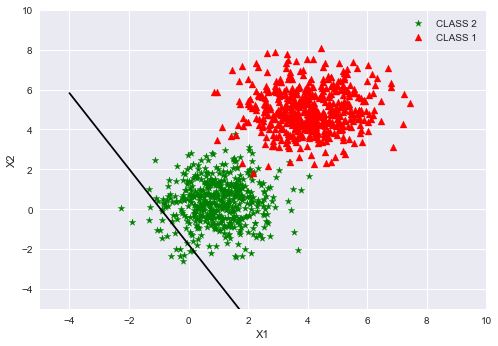

In [27]:
plt.figure()
plt.style.use('seaborn')
plt.scatter(dist_01[:,0],dist_01[:,1],color = 'green',marker='*',label = 'CLASS 2')
plt.scatter(dist_02[:,0],dist_02[:,1],color = 'red',marker='^',label = 'CLASS 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('X1')
plt.ylabel('X2')

x = np.linspace(-4,8,10)
y = -(w[0]*x+b)/w[1]
plt.plot(x,y,color='k')
plt.legend()
plt.show()

In [28]:
# W means theta from theta1 to thetaM & b means theta0
def hypothesis(x, w, b):
    h = np.dot(x, w) + b
    return sigmoid(h)


In [29]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-1.0*z))

In [30]:
def error(y_true, x, w, b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        if (1 - hx) != 0:
            err += y_true[i] * np.log2(hx) + (1 - y_true[i]) * np.log2(1 - hx)
        else:
            err += y_true[i] * np.log2(hx)
    return -err / m


In [31]:
def get_gradient(y_true, x, w, b):
    grad_w = np.zeros(w.shape)
    grad_b = 0.0

    m = x.shape[0]

    for i in range(m):
        hx = hypothesis(x=x[i], w=w, b=b)
        grad_w += -1 * (y_true[i] - hx) * x[i]
        grad_b += -1 * (y_true[i] - hx)
    
    grad_w/= m
    grad_b/=m
    
    return [grad_w,grad_b]
    


In [32]:
def gradient_descent(x,y_true,w,b,learning_rate = 0.1):
    err = error(y_true,x,w,b)
    [grad_w,grad_b] = get_gradient(y_true,x,w,b)
    
    w = w+learning_rate*grad_w
    b = b+learning_rate*grad_b
    
    return err,w,b

def get_acc(x_test,y_test,w,b):
    y_pred = []
    for i in range(y_test.shape[0]):
        p = predict(x_test[i],w,b)
        y_pred.append(p)
    
    y_pred = np.array(y_pred)
    return float((y_pred==y_test).sum())/y_test.shape[0]

In [33]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [34]:
data[:500,:2] = dist_01
data[500:,:2] = dist_02
data[500:,-1] = 1.0

In [35]:
np.random.shuffle(data)
print(data)

[[-0.16256292  0.46664322  0.        ]
 [-0.14459002  0.46664083  0.        ]
 [ 2.72344921  5.00070321  1.        ]
 ...
 [ 1.57613354  3.75149233  0.        ]
 [ 1.05109818 -0.70105048  0.        ]
 [ 1.23876785  2.95537975  0.        ]]


In [36]:
split = int(0.8*data.shape[0])

In [37]:

X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [38]:
loss = []
accuracy = []
w = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [22]:
for i in range(1000):
    l,w,b = gradient_descent(X_train,Y_train,w,b,learning_rate=0.5)
    accuracy.append(get_acc(X_test,Y_test,w,b))
    loss.append(l)

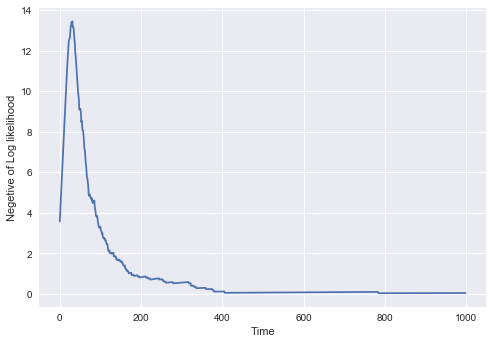

In [23]:
plt.plot(loss)
plt.ylabel("Negetive of Log likelihood")
plt.xlabel("Time")
plt.show()

In [24]:
def predict(x,w,b):
    confidence = hypothesis(x,w,b)
    if(confidence<0.5):
        return 0
    else:
        return 1
    

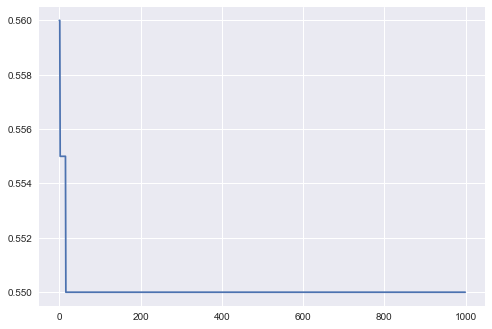

In [25]:
plt.plot(accuracy)
plt.show()